# 1,2,3 더하기 5

[https://www.acmicpc.net/problem/15990](https://www.acmicpc.net/problem/15990)

### 모든 수는 1과 2와 3의 덧셈으로 구성되어있다. 
<br>
<br>

### 수의 구성의 덧셈의 나열로 이루어져있다고 가정했을 때, 
### 어떤 수는 이전의 다른 수의 덧셈 표현의 마지막에 +1, +2, +3을 더하여 만들어진다.

### 그럼 이제 어떤 임의의 수가 만들어질 수 있는 방식의 개수를 마지막 덧셈의 숫자 별로 나누어서 생각해보자.
<br>

### 다이나믹 테이블의 정의는 어떤 수가 만들어지는 방식의 수
### 그 값은 [마지막이 1, 마지막이 2, 마지막이 3] 으로 정의한다.

<!-- ![](image/15990.png) -->
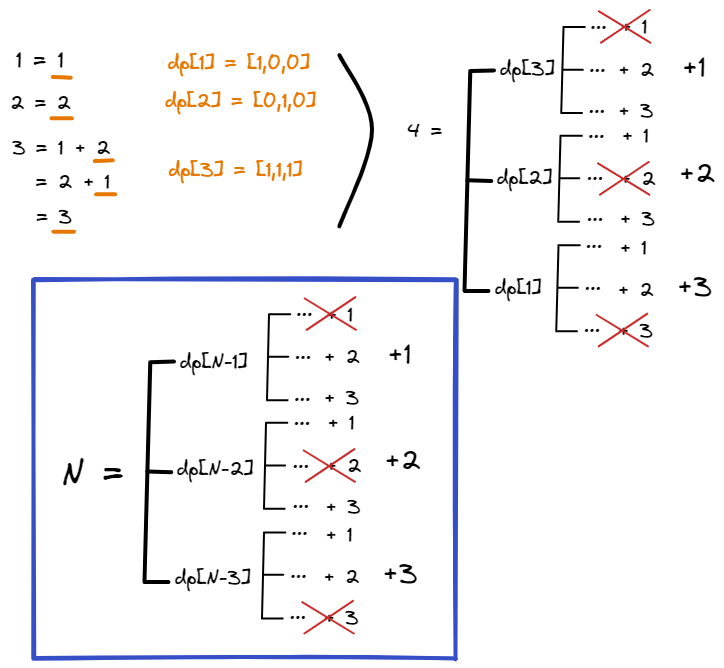

In [ ]:
import sys
input = sys.stdin.readline

t = int(input())
dp = [[0, 0, 0] for _ in range(100001)]

### dp 테이블에 들어갈 값 : 마지막으로 더해진 수가 1,2,3인 개수 배열

In [ ]:
dp[1] = [1, 0, 0]
dp[2] = [0, 1, 0]
dp[3] = [1, 1, 1]

In [ ]:
n = []
for _ in range(t):
    n.append(int(input()))

In [ ]:
for i in range(4, max(n)+1):  # 모듈러 연산의 성질에 따라 (A+B)%C = (A%C + B%C)%C
    if dp[i] == [0, 0, 0]:
        # 숫자 i-1에서 1을 더하는 경우 - 1으로 끝난 경우 제외하고 전부
        dp[i][0] = (dp[i-1][1] + dp[i-1][2]) % 1000000009  # 2로 끝난 경우, 3으로 끝난 경우
        # 숫자 i-2에서 2을 더하는 경우 - 2으로 끝난 경우 제외하고 전부
        dp[i][1] = (dp[i-2][0] + dp[i-2][2]) % 1000000009  # 1로 끝난 경우, 3으로 끝난 경우
        # 숫자 i-3에서 3을 더하는 경우 - 3으로 끝난 경우 제외하고 전부
        dp[i][2] = (dp[i-3][0] + dp[i-3][1]) % 1000000009  # 1로 끝난 경우, 2로 끝난 경우

        # 각각 모듈러 연산을 안해주는 경우 숫자가 커져 덧셈 연산에 시간이 오래 걸리며 시간 초과가 난다.

In [ ]:
for num in n:
    print(sum(dp[num]) % 1000000009)